<a href="https://colab.research.google.com/github/sanjanam26/sanjanam.gihub.io/blob/main/NumbersRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install tensorflow

In [28]:
import tensorflow as tf
import seaborn as sns

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mplmg

In [30]:
#check the version of tensorflow
print(tf.__version__)

2.17.0


In [31]:
#Load data
mnist = tf.keras.datasets.mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [32]:
# Check the shape of x_train and y_train
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


In [33]:
# Print the first image and label in the dataset
print("First image data:\n", x_train[6])
print("First image label:", y_train[6])

First image data:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 145 255 211  31   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  32 237 253 252  71   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11 175 253 252  71   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 144 253 252  71   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0

In [34]:
#check the null values here
np.isnan(x_train).any()

False

<Axes: ylabel='count'>

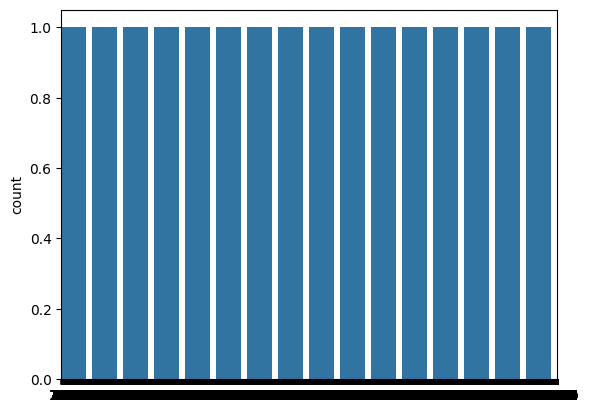

In [10]:
new_var = sns.countplot(y_train)
new_var


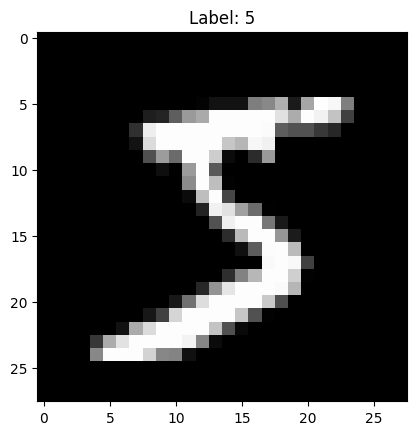

In [35]:

# Display the first image in the training data
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

#	cmap='gray' ensures that the image is displayed in grayscale.
#x_train[0].reshape(28, 28) reshapes the data from (28, 28, 1) to (28, 28)
#for display, as imshow() expects a 2D array for grayscale images.

In [36]:
# Check the data type of x_train and y_train
print("x_train data type:", x_train.dtype)
print("y_train data type:", y_train.dtype)

# Check the range of values in x_train
print("Min pixel value in x_train:", x_train.min())
print("Max pixel value in x_train:", x_train.max())

# Check unique labels in y_train
print("Unique labels in y_train:", set(y_train))

x_train data type: uint8
y_train data type: uint8
Min pixel value in x_train: 0
Max pixel value in x_train: 255
Unique labels in y_train: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


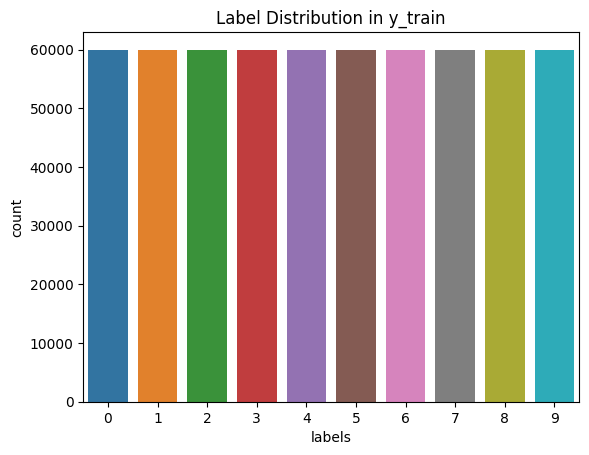

In [43]:
# Plot the distribution of labels
sns.countplot(y_train)
plt.xlabel("labels")
plt.title("Label Distribution in y_train")
plt.show()

In [8]:
np.isnan(x_test).any()

False

In [37]:
input_shape =( 28, 28,1)

x_train = x_train.reshape(x_train.shape[0],
                          x_train.shape[1],
                          x_train.shape[2], 1)
x_train = x_train/255.0

In [38]:

x_test = x_test.reshape(x_test.shape[0],
                          x_test.shape[1],
                          x_test.shape[2], 1)
x_test = x_test/255.0

In [39]:
# label encoding
y_train = tf.one_hot(y_train.astype(np.int32), depth = 10)

In [40]:
y_test = tf.one_hot(y_test.astype(np.int32), depth = 10)

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


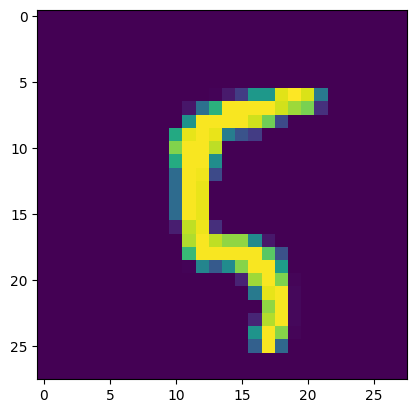

In [41]:
#visualize the data
plt.imshow(x_train[100][:,:,0])
print(y_train[100])

In [53]:
# Process 64 samples at a time before updating its weights during training.
# Predict one of 10 possible classes for each input (likely a classification problem like recognizing handwritten digits or objects).
# Go through the entire dataset 5 times during the training process, which is typically done to ensure the model has learned enough from the data.
batch_size = 64
num_classes = 10
epochs =5

In [72]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(5,5) , padding='same', activation ='relu', input_shape =input_shape),
    tf.keras.layers.Conv2D(32,(5,5) , padding='same', activation ='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32,(3,3) , padding='same', activation ='relu'),
    tf.keras.layers.Conv2D(64,(3,3) , padding='same', activation ='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation= 'softmax') # Changed 128 to num_classes (which is 10)
])

model.compile(optimizer = tf.keras.optimizers.RMSprop(), loss='categorical_crossentropy', metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
# fit the training data :

class myCallback(tf.keras.callbacks.Callback): # Changed 'callback' to 'callbacks'
  def on_epoch_end(self , epoch , logs= {}): # Changed 'log' to 'logs' to match the argument name in the Callback class
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training")
      self.model.stop_training =True

callbacks = myCallback()

In [74]:
history = model.fit(x_train, y_train, batch_size=batch_size,
                    epochs=epochs,
                    validation_split =0.1,
                    callbacks=[callbacks])

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 424s 501ms/step - acc: 0.8552 - loss: 0.4458 - val_acc: 0.9885 - val_loss: 0.0393
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 430s 486ms/step - acc: 0.9796 - loss: 0.0697 - val_acc: 0.9892 - val_loss: 0.0403
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 396s 432ms/step - acc: 0.9865 - loss: 0.0502 - val_acc: 0.9912 - val_loss: 0.0325
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 371s 439ms/step - acc: 0.9886 - loss: 0.0391 - val_acc: 0.9932 - val_loss: 0.0282
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 370s 425ms/step - acc: 0.9903 - loss: 0.0345 - val_acc: 0.9915 - val_loss: 0.0445


Text(0.5, 0, 'epochs')

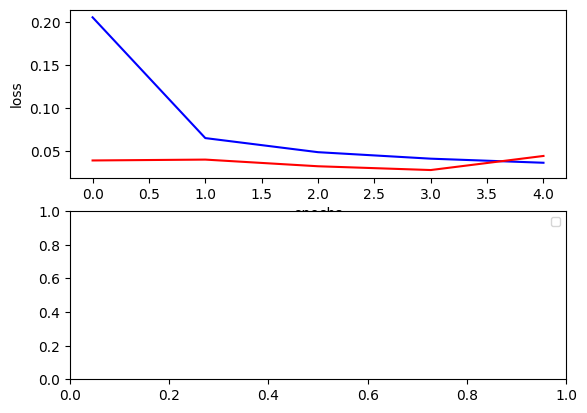

In [75]:
#loss and accuracy

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
plt.legend(loc='best', fontsize='small')
ax[0].set_ylabel("loss")
ax[0].set_xlabel("epochs")

In [76]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - acc: 0.9907 - loss: 0.0311
Test accuracy: 0.9927999973297119


In [77]:
#predict the values from the testing datasets
y_pred = model.predict(x_test)
# convert predictiom classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert testing observations to one hot vectors
y_true = np.argmax(y_test, axis=1)
#Compute the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 108ms/step


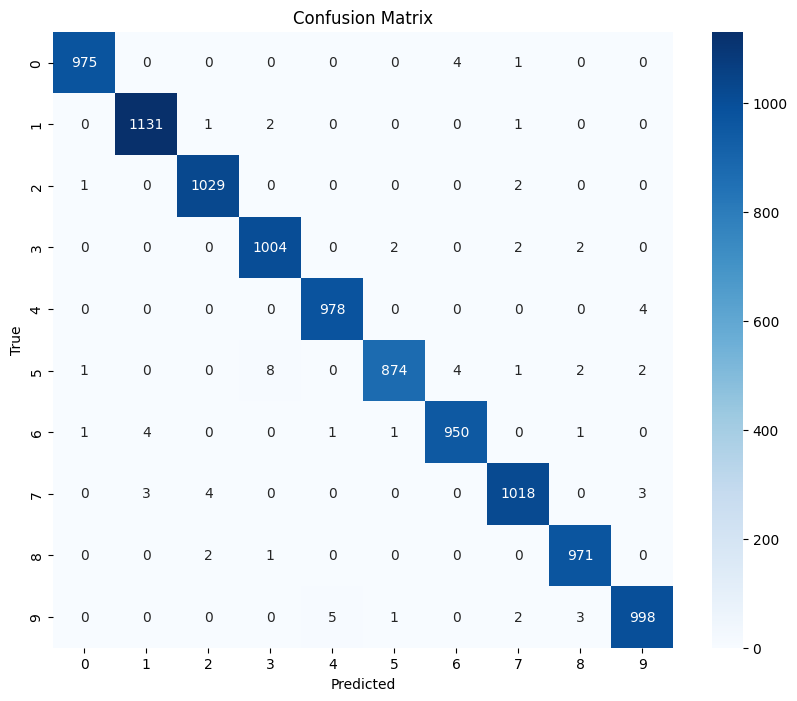

In [78]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()